# Project 1: 단일 자산 기본 모멘텀

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path

root_path = Path('.').resolve()
data_path = root_path / 'mentor_materials' / 'data'

In [3]:
from mentor_materials.momentum import CrossAssetMomentum, get_price_df

c:\Users\chlje\VSCodeProjects\careerhigh_quant\.venv\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


## Data import

### Import all assets

In [4]:
allAssets_df = pd.read_csv(data_path / 'Data.csv')
allAssets_df

,Date,DAX Index,Eurostoxx 50 Index,FTSE 100 Index,S&P 500 Index,Nasdaq 100 Index,Nikkei 225 Index,Topix Index,KOSPI 200 Index,Hang Seng Index,...,UST 5Y,UST 10Y,UST Long,Euro Schatz,Euro Bobl,Euro Bund,Gilt 10Y,JGB 10Y,AGB 3Y,AGB 10Y
0,2000-01-03,8768.903220,2443.196385,4663.410938,1110.469607,3472.256961,14612.63447,1183.492979,125.774501,10900.421630,...,67.205578,56.429022,54.465692,94.644953,80.314443,70.939571,66.326959,101.388587,91.795922,91.597163
1,2000-01-04,8544.026504,2347.719768,4483.277751,1068.829363,3213.045685,14791.12124,1188.332027,127.696511,10671.302490,...,67.431537,67.431537,54.920204,54.920204,94.663425,80.322243,70.829715,65.427993,91.628770,91.439483
2,2000-01-05,8417.734710,2292.443832,4391.038865,1070.154279,3172.402802,14251.78078,1131.646032,118.414606,9827.014147,...,67.173303,67.173303,54.352064,54.352064,94.663425,80.314443,70.644332,65.011255,91.717262,91.557743
3,2000-01-06,8383.584378,2278.876102,4336.564450,1062.961874,2991.767767,13875.40650,1088.785889,113.633019,9393.884811,...,67.291657,67.291657,54.787638,54.787638,94.672662,80.314443,70.548208,64.939814,91.628770,91.459193
4,2000-01-07,8801.764861,2353.749870,4365.973950,1105.169939,3217.109974,14077.17415,1103.994327,114.383072,9566.508822,...,67.442294,67.442294,55.109584,55.109584,94.866625,80.696670,71.124953,65.231531,91.628770,91.478903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5585,2021-05-31,15414.000000,4035.000000,7023.500000,4202.400000,13686.500000,28965.00000,1928.500000,427.700000,28958.000000,...,124.414100,124.414100,158.125000,158.125000,112.045000,134.720000,169.940000,128.270000,99.785000,98.350000
5586,2021-06-01,15567.000000,4070.000000,7078.000000,4198.600000,13648.750000,28760.00000,1920.000000,430.100000,29350.000000,...,124.367200,124.367200,157.718800,157.718800,112.040000,134.710000,169.830000,127.890000,99.800000,98.370000
5587,2021-06-02,15583.000000,4084.000000,7095.000000,4206.200000,13673.750000,28900.00000,1940.500000,429.500000,29144.000000,...,124.421900,124.421900,158.093800,158.093800,112.050000,134.820000,170.150000,128.200000,99.800000,98.380000
5588,2021-06-03,15651.000000,4086.000000,7068.500000,4191.300000,13529.250000,29030.00000,1959.000000,433.450000,28858.000000,...,124.203100,124.203100,157.656300,157.656300,112.045000,134.800000,169.940000,127.890000,99.805000,98.395000


In [5]:
# Convert str type date to pd.datetime64
allAssets_df.loc[:, "Date"] = pd.to_datetime(allAssets_df.loc[:, "Date"], format="%Y-%m-%d")

In [6]:
allAssets_df.set_index("Date", drop=False, inplace=True)

In [7]:
allAssets_df.columns

Index(['Date', 'DAX Index', 'Eurostoxx 50 Index', 'FTSE 100 Index',
       'S&P 500 Index', 'Nasdaq 100 Index', 'Nikkei 225 Index', 'Topix Index',
       'KOSPI 200 Index', 'Hang Seng Index', 'EURUSD', 'GBPUSD', 'SEKUSD',
       'CADUSD', 'JPYUSD', 'AUDUSD', 'NZDUSD', 'USDKRW', 'Brent Crude',
       'WTI Crude', 'Heating Oil', 'Natural Gas', 'Gold', 'Silver', 'Copper',
       'Corn', 'Soybean', 'Eurodollar', 'UST 2Y', 'UST 5Y', 'UST 10Y',
       'UST Long', 'Euro Schatz', 'Euro Bobl', 'Euro Bund', 'Gilt 10Y',
       'JGB 10Y', 'AGB 3Y', 'AGB 10Y'],
      dtype='object')

In [8]:
allAssets_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5590 entries, 2000-01-03 to 2021-06-04
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5590 non-null   datetime64[ns]
 1   DAX Index           5590 non-null   float64       
 2   Eurostoxx 50 Index  5590 non-null   float64       
 3   FTSE 100 Index      5590 non-null   float64       
 4   S&P 500 Index       5590 non-null   float64       
 5   Nasdaq 100 Index    5590 non-null   float64       
 6   Nikkei 225 Index    5590 non-null   float64       
 7   Topix Index         5590 non-null   float64       
 8   KOSPI 200 Index     5590 non-null   float64       
 9   Hang Seng Index     5590 non-null   float64       
 10  EURUSD              5590 non-null   float64       
 11  GBPUSD              5590 non-null   float64       
 12  SEKUSD              5590 non-null   float64       
 13  CADUSD              5590 non-n

### Divide dataframe into eash asset class

In [9]:
allAssets_df.drop('Date', axis=1, inplace=True)

In [10]:
equity_df = allAssets_df.iloc[:, 0:9].copy()

In [11]:
equity_df.columns

Index(['DAX Index', 'Eurostoxx 50 Index', 'FTSE 100 Index', 'S&P 500 Index',
       'Nasdaq 100 Index', 'Nikkei 225 Index', 'Topix Index',
       'KOSPI 200 Index', 'Hang Seng Index'],
      dtype='object')

In [12]:
currency_df = allAssets_df.iloc[:, 9:17].copy()

In [13]:
currency_df.columns

Index(['EURUSD', 'GBPUSD', 'SEKUSD', 'CADUSD', 'JPYUSD', 'AUDUSD', 'NZDUSD',
       'USDKRW'],
      dtype='object')

In [14]:
commodity_df = allAssets_df.iloc[:, 17:26].copy()

In [15]:
commodity_df.columns

Index(['Brent Crude', 'WTI Crude', 'Heating Oil', 'Natural Gas', 'Gold',
       'Silver', 'Copper', 'Corn', 'Soybean'],
      dtype='object')

In [16]:
fixed_df = allAssets_df.iloc[:, 26:].copy()

In [17]:
fixed_df.columns

Index(['Eurodollar', 'UST 2Y', 'UST 5Y', 'UST 10Y', 'UST Long', 'Euro Schatz',
       'Euro Bobl', 'Euro Bund', 'Gilt 10Y', 'JGB 10Y', 'AGB 3Y', 'AGB 10Y'],
      dtype='object')

## Sample code run

주어진 `CrossAssetMomentum()` 사용

In [18]:
# Paramter Setup
lookback_period = 120
holding_period = 20
n_selection = 3

Start date,2000-01-03
End date,2021-06-04
Total months,266
,Backtest
Annual return,1.2%
Cumulative returns,29.2%
Annual volatility,1.3%
Sharpe ratio,0.86
Calmar ratio,0.08
Stability,0.83
Max drawdown,-15.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,15.37,2018-01-05,2020-06-01,NaT,NaN
1,9.17,2009-11-06,2012-07-30,2013-04-25,905
2,8.11,2000-12-19,2001-01-05,2002-09-09,450
3,6.81,2015-03-31,2015-10-15,2017-02-08,487
4,4.88,2004-02-09,2005-04-29,2005-10-14,440


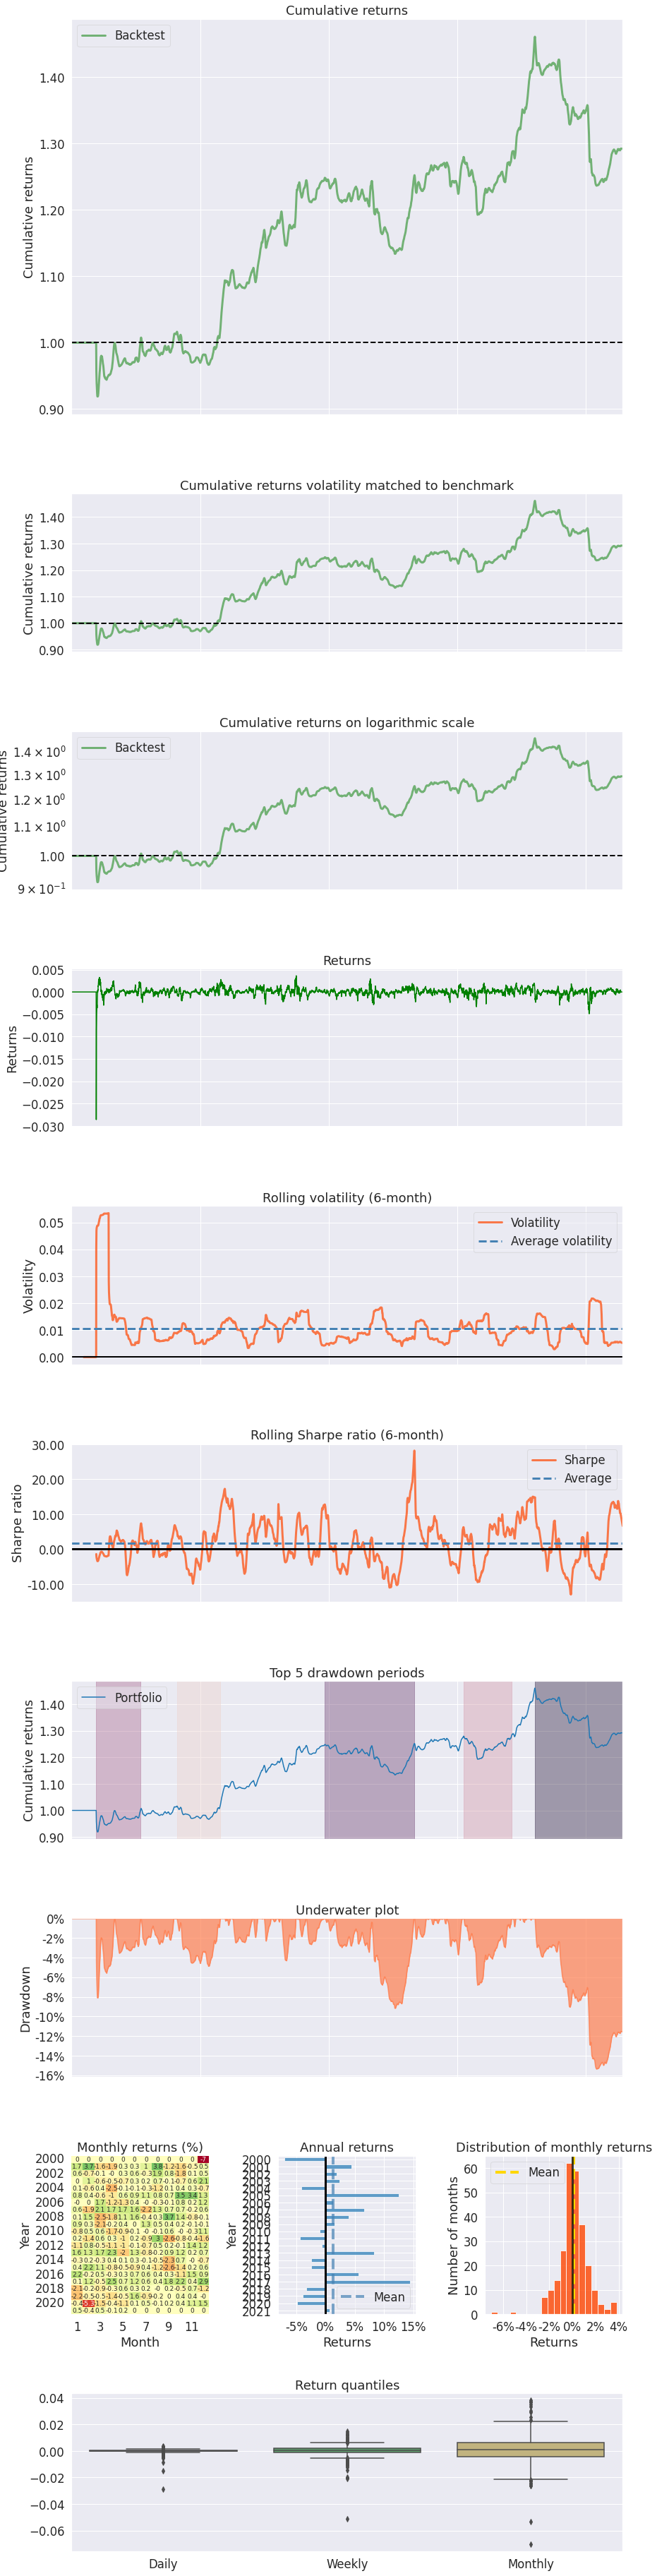

In [19]:
# selected_df = equity_df

equity_CAM = CrossAssetMomentum(
    prices=equity_df,
    lookback_period=lookback_period,
    holding_period=holding_period,
    n_selection=n_selection,
)